# ITS307 Data Analytics : Spring Semester 2022
# Assignment 3 [20 Marks]

# Supervised Learning: Classification

![image.png](attachment:image.png)

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For the purpose of this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this test, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 


# 2. Loading and Cleaning Data with Pandas [3 M]


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [ ]:
col = ['Gender',
'Age',
'Debt',
'Married',
'BankCustomer',
'EducationLevel',
'Ethnicity', 
'YearsEmployed', 
'PriorDefault', 
'Employed', 
'CreditScore', 
'DriversLicense', 
'Citizen', 
'ZipCode', 
'Income',
'ApprovalStatus']

In [ ]:

df = pd.read_csv("creditcard.txt", names=['Gender','AGe',' Debt',' Married','BankCustomer','EducationLevel','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense',' Citizen','ZipCode','Income','ApprovalStatus'])

In [ ]:
df 

Gender    AGe    Debt  Married BankCustomer EducationLevel Ethnicity  \
0        b  30.83   0.000        u            g              w         v   
1        a  58.67   4.460        u            g              q         h   
2        a  24.50   0.500        u            g              q         h   
3        b  27.83   1.540        u            g              w         v   
4        b  20.17   5.625        u            g              w         v   
..     ...    ...     ...      ...          ...            ...       ...   
685      b  21.08  10.085        y            p              e         h   
686      a  22.67   0.750        u            g              c         v   
687      a  25.25  13.500        y            p             ff        ff   
688      b  17.92   0.205        u            g             aa         v   
689      b  35.00   3.375        u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense  Citizen  \
0             1.25            t        t            1              f        g   
1             3.04            t        t            6              f        g   
2             1.50            t        f            0              f        g   
3             3.75            t        t            5              t        g   
4             1.71            t        f            0              f        s   
..             ...          ...      ...          ...            ...      ...   
685           1.25            f        f            0              f        g   
686           2.00            f        t            2              t        g   
687           2.00            f        t            1              t        g   
688           0.04            f        f            0              f        g   
689           8.29            f        f            0              t        g   

    ZipCode  Income ApprovalStatus  
0     00202       0              +  
1     00043     560              +  
2     00280     824              +  
3     00100       3              +  
4     00120       0              +  
..      ...     ...            ...  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -  

[690 rows x 16 columns]

In [ ]:
df.head(5)

Gender    AGe   Debt  Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000        u            g              w         v   
1      a  58.67  4.460        u            g              q         h   
2      a  24.50  0.500        u            g              q         h   
3      b  27.83  1.540        u            g              w         v   
4      b  20.17  5.625        u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense  Citizen  \
0           1.25            t        t            1              f        g   
1           3.04            t        t            6              f        g   
2           1.50            t        f            0              f        g   
3           3.75            t        t            5              t        g   
4           1.71            t        f            0              f        s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [ ]:
df.tail(5)

Gender    AGe    Debt  Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085        y            p              e         h   
686      a  22.67   0.750        u            g              c         v   
687      a  25.25  13.500        y            p             ff        ff   
688      b  17.92   0.205        u            g             aa         v   
689      b  35.00   3.375        u            g              c         h   

     YearsEmployed PriorDefault Employed  CreditScore DriversLicense  Citizen  \
685           1.25            f        f            0              f        g   
686           2.00            f        t            2              t        g   
687           2.00            f        t            1              t        g   
688           0.04            f        f            0              f        g   
689           8.29            f        f            0              t        g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

## 2.2.  Print summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   AGe             690 non-null    object 
 2    Debt           690 non-null    float64
 3    Married        690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12   Citizen        690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
df.describe()

Debt  YearsEmployed  CreditScore         Income
count  690.000000     690.000000    690.00000     690.000000
mean     4.758725       2.223406      2.40000    1017.385507
std      4.978163       3.346513      4.86294    5210.102598
min      0.000000       0.000000      0.00000       0.000000
25%      1.000000       0.165000      0.00000       0.000000
50%      2.750000       1.000000      0.00000       5.000000
75%      7.207500       2.625000      3.00000     395.500000
max     28.000000      28.500000     67.00000  100000.000000

The nature of the target value is categorical or classification.

## 2.3. Check null values for all the colums in the dataset

In [ ]:
df.isna().sum()

Gender            0
AGe               0
 Debt             0
 Married          0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
 Citizen          0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [ ]:
df.dtypes

Gender             object
AGe                object
 Debt             float64
 Married           object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
 Citizen           object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [ ]:
import numpy as np
df.replace('?',np.nan, inplace=True)

In [ ]:
df.isna().sum()

Gender            12
AGe               12
 Debt              0
 Married           6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
 Citizen           0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [ ]:
df.dtypes

Gender             object
AGe                object
 Debt             float64
 Married           object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
 Citizen           object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [ ]:
df['AGe'] = df.AGe.astype('float')
df['ZipCode'] = df.ZipCode.astype('float')
df.dtypes

Gender             object
AGe               float64
 Debt             float64
 Married           object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
 Citizen           object
ZipCode           float64
Income              int64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values [3 M]

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
print(type(categorical_features)) # to see the datatypes of the return value
categorical_features

<class 'pandas.core.frame.DataFrame'>


Gender  Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        b        u            g              w         v            t   
1        a        u            g              q         h            t   
2        a        u            g              q         h            t   
3        b        u            g              w         v            t   
4        b        u            g              w         v            t   
..     ...      ...          ...            ...       ...          ...   
685      b        y            p              e         h            f   
686      a        u            g              c         v            f   
687      a        y            p             ff        ff            f   
688      b        u            g             aa         v            f   
689      b        u            g              c         h            f   

    Employed DriversLicense  Citizen ApprovalStatus  
0          t              f        g              +  
1          t              f        g              +  
2          f              f        g              +  
3          t              t        g              +  
4          f              f        s              +  
..       ...            ...      ...            ...  
685        f              f        g              -  
686        t              t        g              -  
687        t              t        g              -  
688        f              f        g              -  
689        f              t        g              -  

[690 rows x 10 columns]

In [ ]:
numerical_features = df.select_dtypes(include=['float64','int64'])

In [ ]:
numerical_features

AGe    Debt  YearsEmployed  CreditScore  ZipCode  Income
0    30.83   0.000           1.25            1    202.0       0
1    58.67   4.460           3.04            6     43.0     560
2    24.50   0.500           1.50            0    280.0     824
3    27.83   1.540           3.75            5    100.0       3
4    20.17   5.625           1.71            0    120.0       0
..     ...     ...            ...          ...      ...     ...
685  21.08  10.085           1.25            0    260.0       0
686  22.67   0.750           2.00            2    200.0     394
687  25.25  13.500           2.00            1    200.0       1
688  17.92   0.205           0.04            0    280.0     750
689  35.00   3.375           8.29            0      0.0       0

[690 rows x 6 columns]

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [ ]:
categorical_features.isna().sum()

Gender            12
 Married           6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
Employed           0
DriversLicense     0
 Citizen           0
ApprovalStatus     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_mode_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
new_categorical_features = imp_mode_1.fit_transform(categorical_features)
new_categorical_features= pd.DataFrame(data = new_categorical_features, columns = categorical_features.columns)
new_categorical_features
#new_categorical_features = imp_mode_1.fit_transform(categorical_features.iloc[:,:])

Gender  Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        b        u            g              w         v            t   
1        a        u            g              q         h            t   
2        a        u            g              q         h            t   
3        b        u            g              w         v            t   
4        b        u            g              w         v            t   
..     ...      ...          ...            ...       ...          ...   
685      b        y            p              e         h            f   
686      a        u            g              c         v            f   
687      a        y            p             ff        ff            f   
688      b        u            g             aa         v            f   
689      b        u            g              c         h            f   

    Employed DriversLicense  Citizen ApprovalStatus  
0          t              f        g              +  
1          t              f        g              +  
2          f              f        g              +  
3          t              t        g              +  
4          f              f        s              +  
..       ...            ...      ...            ...  
685        f              f        g              -  
686        t              t        g              -  
687        t              t        g              -  
688        f              f        g              -  
689        f              t        g              -  

[690 rows x 10 columns]

In [ ]:
#new_categorical_features_df = pd.DataFrame(data=new_categorical_features, columns=categorical_features.columns)

In [ ]:
#new_categorical_features_df.head()

In [ ]:
new_categorical_features.isnull().sum()

Gender            0
 Married          0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
Employed          0
DriversLicense    0
 Citizen          0
ApprovalStatus    0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. If you are not aware with SimpleImputer, you may chose other imputation techniques you are confortable with for handling categorical values.


- Check missing records after imputation

In [ ]:
numerical_features.isna().sum()

AGe              12
 Debt             0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#new_numerical_features = imp.fit_transform(numerical_features.iloc[:,:])
new_numerical_features = imp.fit_transform(numerical_features)

In [ ]:
new_numerical_features = pd.DataFrame(data=new_numerical_features, columns=numerical_features.columns)

In [ ]:
new_numerical_features.head()

AGe   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25          1.0    202.0     0.0
1  58.67  4.460           3.04          6.0     43.0   560.0
2  24.50  0.500           1.50          0.0    280.0   824.0
3  27.83  1.540           3.75          5.0    100.0     3.0
4  20.17  5.625           1.71          0.0    120.0     0.0

In [ ]:
new_numerical_features.isnull().sum()

AGe              0
 Debt            0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features[1.5]
- Use any scaling techniques to scale all the numerical features

In [ ]:
RobustScaler?

In [ ]:
new_numerical_features_sca = RobustScaler().fit_transform(new_numerical_features)

In [ ]:
new_categorical_features_sca = pd.DataFrame(data=new_numerical_features, 
                                               columns=new_numerical_features.columns)

In [ ]:
new_categorical_features_sca.head()

AGe   Debt  YearsEmployed  CreditScore  ZipCode  Income
0  30.83  0.000           1.25          1.0    202.0     0.0
1  58.67  4.460           3.04          6.0     43.0   560.0
2  24.50  0.500           1.50          0.0    280.0   824.0
3  27.83  1.540           3.75          5.0    100.0     3.0
4  20.17  5.625           1.71          0.0    120.0     0.0

In [ ]:
## Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_scaled= scaler.fit_transform(new_numerical_features)

In [ ]:
new_numerical_features = pd.DataFrame(data = numeric_scaled, columns = new_numerical_features.columns)
new_numerical_features

AGe      Debt  YearsEmployed  CreditScore   ZipCode    Income
0   -0.062321 -0.956613      -0.291083    -0.288101  0.104544 -0.195413
1    2.288101 -0.060051       0.244190     0.740830 -0.819689 -0.087852
2   -0.596738 -0.856102      -0.216324    -0.493887  0.557942 -0.037144
3   -0.315599 -0.647038       0.456505     0.535044 -0.488360 -0.194837
4   -0.962303  0.174141      -0.153526    -0.493887 -0.372104 -0.195413
..        ...       ...            ...          ...       ...       ...
685 -0.885475  1.070704      -0.291083    -0.493887  0.441686 -0.195413
686 -0.751238 -0.805846      -0.066806    -0.082314  0.092919 -0.119736
687 -0.533418  1.757198      -0.066806    -0.288101  0.092919 -0.195221
688 -1.152262 -0.915403      -0.652915    -0.493887  0.557942 -0.051358
689  0.289736 -0.278161       1.814125    -0.493887 -1.069639 -0.195413

[690 rows x 6 columns]

# 5. Encode Categorical data[2.5 M]
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [ ]:
new_categorical_features.head()

Gender  Married BankCustomer EducationLevel Ethnicity PriorDefault Employed  \
0      b        u            g              w         v            t        t   
1      a        u            g              q         h            t        t   
2      a        u            g              q         h            t        f   
3      b        u            g              w         v            t        t   
4      b        u            g              w         v            t        f   

  DriversLicense  Citizen ApprovalStatus  
0              f        g              +  
1              f        g              +  
2              f        g              +  
3              t        g              +  
4              f        s              +

In [ ]:
cat_feature_df = pd.get_dummies(new_categorical_features.iloc[:,:-1])
y_ = new_categorical_features.iloc[:,-1]

In [ ]:
y_

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: ApprovalStatus, Length: 690, dtype: object

In [ ]:
#y = new_categorical_features.ApprovalStatus

In [ ]:
#new_categorical_features = new_categorical_features.drop(["ApprovalStatus"], axis = 1)

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#oe = OrdinalEncoder()
#encoded_data = oe.fit_transform(new_categorical_features)
#new_categorical_features = pd.DataFrame(data = encoded_data,columns=new_categorical_features.columns)

In [ ]:
#X = pd.concat([new_categorical_features, new_numerical_features],axis=1)
#X.head()

In [ ]:
cat_feature_df

Gender_a  Gender_b   Married_l   Married_u   Married_y  BankCustomer_g  \
0           0         1           0           1           0               1   
1           1         0           0           1           0               1   
2           1         0           0           1           0               1   
3           0         1           0           1           0               1   
4           0         1           0           1           0               1   
..        ...       ...         ...         ...         ...             ...   
685         0         1           0           0           1               0   
686         1         0           0           1           0               1   
687         1         0           0           0           1               0   
688         0         1           0           1           0               1   
689         0         1           0           1           0               1   

     BankCustomer_gg  BankCustomer_p  EducationLevel_aa  EducationLevel_c  \
0                  0               0                  0                 0   
1                  0               0                  0                 0   
2                  0               0                  0                 0   
3                  0               0                  0                 0   
4                  0               0                  0                 0   
..               ...             ...                ...               ...   
685                0               1                  0                 0   
686                0               0                  0                 1   
687                0               1                  0                 0   
688                0               0                  1                 0   
689                0               0                  0                 1   

     ...  Ethnicity_z  PriorDefault_f  PriorDefault_t  Employed_f  Employed_t  \
0    ...            0               0               1           0           1   
1    ...            0               0               1           0           1   
2    ...            0               0               1           1           0   
3    ...            0               0               1           0           1   
4    ...            0               0               1           1           0   
..   ...          ...             ...             ...         ...         ...   
685  ...            0               1               0           1           0   
686  ...            0               1               0           0           1   
687  ...            0               1               0           0           1   
688  ...            0               1               0           1           0   
689  ...            0               1               0           1           0   

     DriversLicense_f  DriversLicense_t   Citizen_g   Citizen_p   Citizen_s  
0                   1                 0           1           0           0  
1                   1                 0           1           0           0  
2                   1                 0           1           0           0  
3                   0                 1           1           0           0  
4                   1                 0           0           0           1  
..                ...               ...         ...         ...         ...  
685                 1                 0           1           0           0  
686                 0                 1           1           0           0  
687                 0                 1           1           0           0  
688                 1                 0           1           0           0  
689                 0                 1           1           0           0  

[690 rows x 40 columns]

In [ ]:
le = LabelEncoder()
cat_tar = le.fit_transform(y_)

In [ ]:
tar_get_df = pd.DataFrame(data=cat_tar, columns=['ApprovalStatus'])

In [ ]:
final_df = pd.concat([new_categorical_features_sca, cat_feature_df, tar_get_df],axis=1)

In [ ]:
final_df.head()

AGe   Debt  YearsEmployed  CreditScore  ZipCode  Income  Gender_a  \
0  30.83  0.000           1.25          1.0    202.0     0.0         0   
1  58.67  4.460           3.04          6.0     43.0   560.0         1   
2  24.50  0.500           1.50          0.0    280.0   824.0         1   
3  27.83  1.540           3.75          5.0    100.0     3.0         0   
4  20.17  5.625           1.71          0.0    120.0     0.0         0   

   Gender_b   Married_l   Married_u  ...  PriorDefault_f  PriorDefault_t  \
0         1           0           1  ...               0               1   
1         0           0           1  ...               0               1   
2         0           0           1  ...               0               1   
3         1           0           1  ...               0               1   
4         1           0           1  ...               0               1   

   Employed_f  Employed_t  DriversLicense_f  DriversLicense_t   Citizen_g  \
0           0           1                 1                 0           1   
1           0           1                 1                 0           1   
2           1           0                 1                 0           1   
3           0           1                 0                 1           1   
4           1           0                 1                 0           0   

    Citizen_p   Citizen_s  ApprovalStatus  
0           0           0               0  
1           0           0               0  
2           0           0               0  
3           0           0               0  
4           0           1               0  

[5 rows x 47 columns]

# 6. Training Model [3 M]

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [ ]:
X = final_df.iloc[:,:-1]
#y = final_df.iloc[:,-1]
y =final_df["ApprovalStatus"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators= 50,min_samples_leaf=2)
RF.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_k = KNeighborsClassifier(n_neighbors=4)
model_k.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=4)

# 7. Evaluating the model [3 M]

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.

In [ ]:
#Logistic Regression
log.score(x_train, y_train)

0.8677536231884058

In [ ]:
log.score(x_test, y_test)

0.8840579710144928

In [ ]:
#Random Forest
RF.score(x_train, y_train)

0.9510869565217391

In [ ]:
RF.score(x_test, y_test)

0.8695652173913043

In [ ]:
 model_k.score(x_train,y_train)

0.8043478260869565

In [ ]:
 model_k.score(x_test,y_test)

0.6594202898550725

# 8. Making Prediction [2 M]
- Take any sample record from your training data and make prediction.

In [ ]:
l_pred=log.predict(x_test)
l_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0])

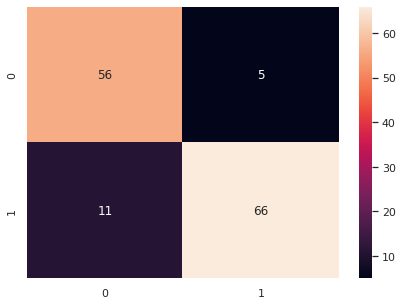

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,l_pred)
corr=df.corr()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
k_pred=model_k.predict(x_test)
k_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0])

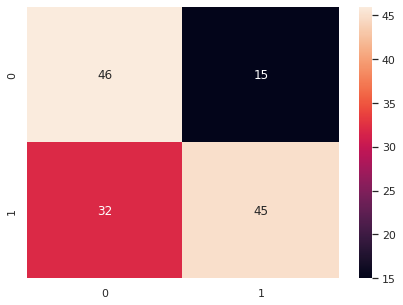

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,k_pred)
corr=df.corr()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
R_pred= RF.predict(x_test)
R_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0])

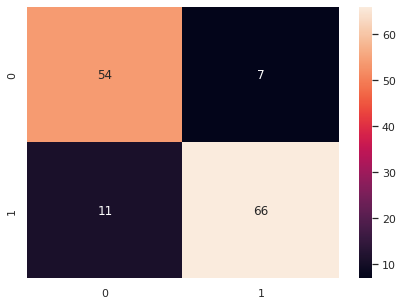

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,R_pred)
corr=df.corr()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(cm,annot=True)
plt.show()

# 9. Conclusion [1 M]

- Conclude your takeaway from this activity.

The Logistic model is the best model